In [95]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt

In [16]:
star_data = Table.read('/d/scratch/ASTR5160/week10/stars-ra180-dec30-rad3.fits')
qso_data = Table.read('/d/scratch/ASTR5160/week10/qsos-ra180-dec30-rad3.fits')

In [71]:
files = ['/d/scratch/ASTR5160/data/legacysurvey/dr9/south/sweep/9.0/sweep-170p030-180p035.fits',
         '/d/scratch/ASTR5160/data/legacysurvey/dr9/south/sweep/9.0/sweep-180p025-190p030.fits',
         '/d/scratch/ASTR5160/data/legacysurvey/dr9/south/sweep/9.0/sweep-180p030-190p035.fits']

hdul = fits.open('/d/scratch/ASTR5160/data/legacysurvey/dr9/south/sweep/9.0/sweep-170p025-180p030.fits')
data = hdul[1].data
hdul.close()

all_data = np.vstack((data['RA'], data['DEC'], 
                      data['FLUX_G']/data['MW_TRANSMISSION_G'], 
                      data['FLUX_R']/data['MW_TRANSMISSION_R'], 
                      data['FLUX_Z']/data['MW_TRANSMISSION_Z'], 
                      data['FLUX_W1']/data['MW_TRANSMISSION_W1'], 
                      data['FLUX_W2']/data['MW_TRANSMISSION_W2']))

for i in files:
    hdul = fits.open(i)
    data = hdul[1].data
    hdul.close()

    tem = np.vstack((data['RA'], data['DEC'], 
                      data['FLUX_G']/data['MW_TRANSMISSION_G'], 
                      data['FLUX_R']/data['MW_TRANSMISSION_R'], 
                      data['FLUX_Z']/data['MW_TRANSMISSION_Z'], 
                      data['FLUX_W1']/data['MW_TRANSMISSION_W1'], 
                      data['FLUX_W2']/data['MW_TRANSMISSION_W2']))

    all_data = np.hstack((all_data, tem))

In [72]:
sweep_sample = SkyCoord(all_data[0, :]*u.deg, all_data[1, :]*u.deg)
star_sample =  SkyCoord(star_data['RA']*u.deg, star_data['DEC']*u.deg)
qso_sample =  SkyCoord(qso_data['RA']*u.deg, qso_data['DEC']*u.deg)

In [73]:
index_star, _, _, _ = star_sample.search_around_sky(sweep_sample, 0.5*u.arcsec)
index_qso, _, _, _ = qso_sample.search_around_sky(sweep_sample, 0.5*u.arcsec)

In [94]:
star = all_data[:, index_star.flatten()]
qso = all_data[:, index_qso.flatten()]

star_mag = (lambda x: 22.5 - np.log10(x))(star[2:])
qso_mag = (lambda x: 22.5 - np.log10(x))(qso[2:])

/tmp/ipykernel_2540904/4175964428.py:4: RuntimeWarning: divide by zero encountered in log10
  star_mag = (lambda x: 22.5 - np.log10(x))(star[2:])
/tmp/ipykernel_2540904/4175964428.py:4: RuntimeWarning: invalid value encountered in log10
  star_mag = (lambda x: 22.5 - np.log10(x))(star[2:])
/tmp/ipykernel_2540904/4175964428.py:5: RuntimeWarning: invalid value encountered in log10
  qso_mag = (lambda x: 22.5 - np.log10(x))(qso[2:])


/tmp/ipykernel_2540904/3492542331.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.scatter(star_mag[0]-star_mag[2], star_mag[1]-star_mag[3], label='star')


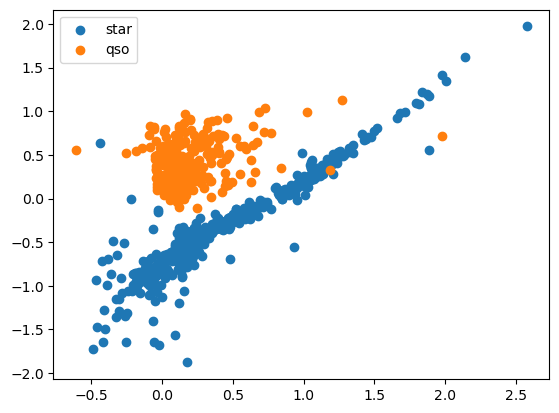

In [99]:
plt.scatter(star_mag[0]-star_mag[2], star_mag[1]-star_mag[3], label='star')
plt.scatter(qso_mag[0]-qso_mag[2], qso_mag[1]-qso_mag[3], label='qso')
plt.legend()
plt.show()

## There is a clear difference on the color plot!